In [1]:
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.metricBundles as metricBundles
import healpy as hp
import matplotlib.pylab as plt
import rubin_sim.maf.db as db
%matplotlib inline

In [2]:
dbFile = 'baseline_v2.2_10yrs.db'
runName = dbFile.replace('.db', '')

nside = 2
slicer = slicers.HealpixSlicer(nside=nside)

metric = metrics.SNNSNMetric()  #, zlim_coeff=0.98)
bundleList = []

sql = ''
#sql = '(note = "%s")' %('DD:COSMOS')
sn_summary = [
        metrics.MedianMetric(),
        metrics.MeanMetric(),
        metrics.SumMetric(metricName="Total detected"),
        metrics.CountMetric(metricName="Total on sky", maskVal=0),
    ]
bundleList.append(metricBundles.MetricBundle(metric, slicer, sql, runName=runName, summaryMetrics=sn_summary))

outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, dbFile, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll()

Healpix slicer using NSIDE=2, approximate resolution 1758.969043 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 62322 799 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 72709 799 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0


Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.


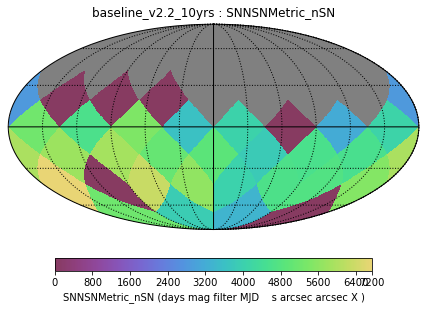

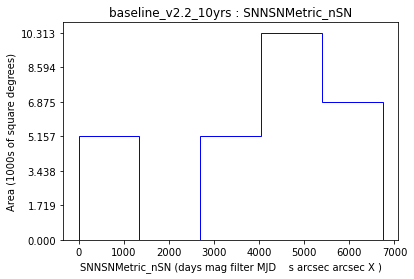

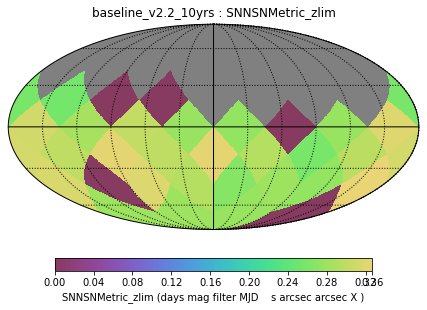

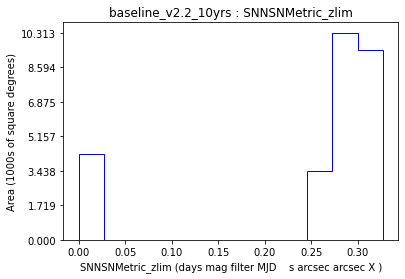

In [3]:
bgroup.plotAll(closefigs=False)

In [4]:
for key in bundleDict:
    print(key, bundleDict[key].summaryValues)

baseline_v2_2_10yrs_SNNSNMetric_HEAL {}
SNNSNMetric_nSN {'Median': 4551.66959, 'Mean': 3865.3263456249997, 'Total detected': 123690.44305999999, 'Total on sky': 48}
SNNSNMetric_zlim {'Median': 0.28157, 'Mean': 0.246843125, 'Total detected': 7.89898, 'Total on sky': 48}


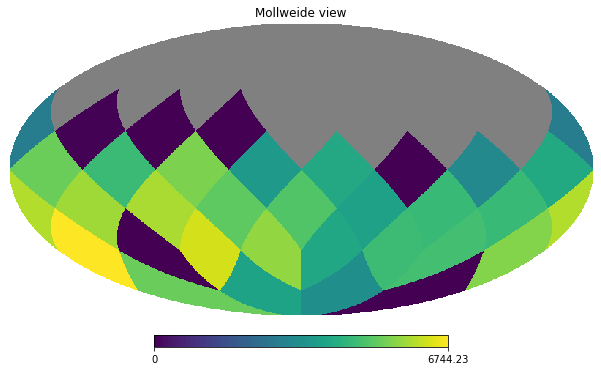

In [7]:
hp.mollview(bundleDict['SNNSNMetric_nSN'].metricValues)

In [6]:
bundleDict['SNNSNMetric_nSN'].metricValues.min()

0.0